## import

In [1]:
import quantrocket.master
from quantrocket.master import get_securities
import pandas as pd

In [96]:
from quantrocket.zipline import create_usstock_bundle
from quantrocket.zipline import ingest_bundle
from quantrocket.zipline import get_bundle_config
from quantrocket.master import create_universe
from quantrocket.master import delete_universe
from quantrocket.history import create_edi_db
from quantrocket.history import create_ibkr_db
from quantrocket.history import collect_history
from quantrocket.history import drop_db
from quantrocket.history import get_db_config
from quantrocket.zipline import create_bundle_from_db, drop_bundle
from quantrocket.ibg import start_gateways
from quantrocket import get_prices

In [2]:
exchanges_ind_result = quantrocket.master.list_ibkr_exchanges(regions=None, sec_types='IND')

In [10]:
exchanges_ind_result

{'IND': {'United States': ['CFE',
   'CBOE',
   'CME',
   'CBOT',
   'COMEX',
   'NYMEX',
   'ISEOPT',
   'NASDAQ',
   'NSX',
   'NYSE',
   'AMEX',
   'PSE',
   'NYSELIFFE',
   'PHLX'],
  'Canada': ['CDE', 'TSE'],
  'Austria': ['VSE'],
  'Belgium': ['BELFOX'],
  'France': ['MATIF', 'MONEP'],
  'Germany': ['EUREX', 'IBIS'],
  'Italy': ['BVME'],
  'Netherlands': ['FTA', 'ENDEX'],
  'Spain': ['BM', 'MEFFRV'],
  'Sweden': ['OMS', 'SFB'],
  'Switzerland': ['SOFFEX', 'EBS', 'VIRTX'],
  'United Kingdom': ['ICEEU', 'ICEEUSOFT', 'LSE'],
  'Australia': ['SNFE', 'ASX'],
  'Hong Kong': ['HKFE'],
  'India': ['NSE'],
  'Japan': ['OSE.JPN', 'TSE.JPN'],
  'Singapore': ['SGX'],
  'South Korea': ['KSE']}}

## fx info

In [11]:
exchanges_ind = []
for c, exs in exchanges_ind_result['IND'].items():
    exchanges_ind += exs

In [114]:
collect_ibkr_listings(exchanges=exchanges_ind, sec_types="IND")

{'status': 'the IBKR listing details will be collected asynchronously'}

In [164]:
collect_ibkr_listings(exchanges="OSE.JPN", symbols=["NKY"], sec_types="IND")

{'status': 'the IBKR listing details will be collected asynchronously'}

In [53]:
df_all = get_securities()

/tmp/ipykernel_96/2596729476.py:1: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  df_all = get_securities()


In [302]:
df_ = df_all[['Symbol', 'Name', 'Country', 'SecType']].dropna()

In [55]:
df = get_securities(sec_types="IND")

In [56]:
df.Name.values

array(['SGX USD/INR (USD) Month-end', 'NASDAQ Transportation Index',
       'DOW JONES 15 UTILITY INDEX', ...,
       'INTER@CTIVE WEEK INTERNET INDEX', 'AMEX Disk Drive Index',
       'Mini-NDX Index'], dtype=object)

In [194]:
symbol_pairs = [
    ("ASX", "AUD.USD"),
    ("SSEC", "USD.CNH"), # china
    ("NZCI", "NZD.USD"), #newzealand
    ("OBX", "USD.NOK"), # norway
    ("GSPTSE", "USD.CAD"), # canada
    ("N300", "USD.JPY"), # japan
    ("SET", "USD.THB"),
    ("SSMI", "USD.CHF"), # swiss
    ("XU100", "USD.TRY"), # turkey
    ("WIG", "USD.PLN"), # poland
    ("STI", "USD.SGD"),
    ("PX", "USD.CZK"),
    ("OMXCPI", "USD.DKK"), # denmark
    ("BUX", "USD.HUF"), # hungary
    ("MSCIEU", "EUR.USD"),
    ("FTSE", "GBP.USD"), # uk
    ("MXX", "USD.MXN"), # mexico
    ("HSI", "USD.HKD"),
    ("OMX", "USD.SEK"), # sweden
    ("JALSH", "USD.ZAR"), # south africa
    ("?", "USD.KRW")] # south africa

symbols_indx = [p[0] for p in symbol_pairs]
symbols_fx = [p[1] for p in symbol_pairs]

In [195]:
df_fx = get_securities(symbols_fx, sec_types="CASH")

In [198]:
get_securities(sec_types="CASH")

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FXAUDUSD,AUD.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,Australian dollar,1,1,False,NaT,NaT,NaT
FXEURUSD,EUR.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,European Monetary Union Euro,1,1,False,NaT,NaT,NaT
FXGBPUSD,GBP.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,British pound,1,1,False,NaT,NaT,NaT
FXNZDUSD,NZD.USD,IDEALPRO,NaN,USD,CASH,False,America/New_York,New Zealand dollar,1,1,False,NaT,NaT,NaT
FXUSDCAD,USD.CAD,IDEALPRO,NaN,CAD,CASH,False,America/New_York,United States dollar,1,1,False,NaT,NaT,NaT
FXUSDCHF,USD.CHF,IDEALPRO,NaN,CHF,CASH,False,America/New_York,United States dollar,1,1,False,NaT,NaT,NaT
FXUSDCNH,USD.CNH,IDEALPRO,NaN,CNH,CASH,False,America/New_York,United States dollar,1,1,False,NaT,NaT,NaT
FXUSDCZK,USD.CZK,IDEALPRO,NaN,CZK,CASH,False,America/New_York,United States dollar,1,1,False,NaT,NaT,NaT
FXUSDHKD,USD.HKD,IDEALPRO,NaN,HKD,CASH,False,America/New_York,United States dollar,1,1,False,NaT,NaT,NaT


In [196]:
df_fx.reset_index()[['Sid', 'Symbol']]

,Sid,Symbol
0,FXAUDUSD,AUD.USD
1,FXEURUSD,EUR.USD
2,FXGBPUSD,GBP.USD
3,FXNZDUSD,NZD.USD
4,FXUSDCAD,USD.CAD
5,FXUSDCHF,USD.CHF
6,FXUSDCNH,USD.CNH
7,FXUSDCZK,USD.CZK
8,FXUSDHKD,USD.HKD
9,FXUSDHUF,USD.HUF


## data setup

### create db

In [112]:
# NOTC, XBUD, XCNQ, XJPX, XKRX, XLON, XMEX, XNZE, XSHG, XTSE
create_edi_db("china-1d", exchanges=["XSHG"])
create_edi_db("norway-1d", exchanges=["NOTC"])
create_edi_db("hungary-1d", exchanges=["XBUD"])
create_edi_db("canada-1d", exchanges=["XCNQ", "XTSE"])
create_edi_db("japan-1d", exchanges=["XJPX"])
create_edi_db("london-1d", exchanges=["XLON"])
create_edi_db("mexico-1d", exchanges=["XMEX"])
create_edi_db("newzealand-1d", exchanges=["XNZE"])
create_edi_db("korea-1d", exchanges=["XKRX"])

# XETR, XHKG, XKOS, XNAS, XNYS, XOTC, XPAR, XSES, XSTO, XSWX
create_edi_db("germany-1d", exchanges=["XETR"])
create_edi_db("hongkong-1d", exchanges=["XHKG"])
create_edi_db("kosdaq-1d", exchanges=["XKOS"])
create_edi_db("nasdaq-1d", exchanges=["XNAS"])
create_edi_db("nyse-1d", exchanges=["XNYS"])
create_edi_db("usotc-1d", exchanges=["XOTC"])
create_edi_db("france-1d", exchanges=["XPAR"])
create_edi_db("singapore-1d", exchanges=["XSES"])
create_edi_db("sweden-1d", exchanges=["XSTO"])
create_edi_db("swiss-1d", exchanges=["XSWX"])

create_edi_db("global-1d", exchanges=["XSHG", "NOTC", "XBUD", "XCNQ", "XTSE", "XJPX", "XLON", "XMEX", "XNZE", "XKRX", "XETR", "XHKG", "XKOS", "XNAS", "XNYS", "XOTC", "XPAR", "XSES", "XSTO", "XSWX"])

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/history/databases/china-1d?vendor=edi&exchanges=XSHG', {'status': 'error', 'msg': 'quantrocket.v2.history.china-1d.sqlite already exists'})

In [ ]:
create_ibkr_db("global-indices-1d", sids=sids, bar_size="1 day", bar_type="ADJUSTED_LAST", shard="off")

In [206]:
sids_cash = list(get_securities(sec_types="CASH").reset_index()['Sid'].values)

In [208]:
#drop_db("fx-1d", confirm_by_typing_db_code_again="fx-1d")
create_ibkr_db("fx-1d", sids=sids_cash, bar_size="1 day", bar_type="MIDPOINT", shard="off")

{'status': 'successfully created quantrocket.v2.history.fx-1d.sqlite'}

### create bundle

In [ ]:
create_usstock_bundle("usstock-1d", data_frequency="daily")

In [46]:
#drop_bundle("bundle-global-currency-flow-indices-1d", confirm_by_typing_bundle_code_again="bundle-global-currency-flow-indices-1d")
create_bundle_from_db("bundle-global-currency-flow-indices-1d", "global-1d", "24/5", start_date="2014-01-01", sids=sids_index + [sid_snp500])

{'status': 'success',
 'msg': 'successfully created bundle-global-currency-flow-indices-1d bundle'}

In [83]:
#drop_bundle("bundle-global-currency-flow-indices-1d", confirm_by_typing_bundle_code_again="bundle-global-currency-flow-indices-1d")
create_bundle_from_db("bundle-global-currency-flow-indices-1d", ["global-1d", "fx-1d"], "24/5", start_date="2014-01-01", sids=sids_index + [sid_snp500]) # + sids_currency

{'status': 'success',
 'msg': 'successfully created bundle-global-currency-flow-indices-1d bundle'}

In [86]:
#drop_bundle("fx-1d", confirm_by_typing_bundle_code_again="bundle-global-currency-flow-indices-1d")
create_bundle_from_db("fx-1d", "fx-1d", "24/5", start_date="2014-01-01", sids=sids_currency)

{'status': 'success', 'msg': 'successfully created fx-1d bundle'}

### create universe

In [125]:
sids_trading_currency_flow = ["FIBBG00203J8V6", "FIBBG0029T2KJ5", "FIBBG000BL97R6", "FIBBG0015XN496", "FIBBG000QGWGG7", "FIBBG000QZXB02", "FIBBG001CGQZG5", "FIBBG000PQY818", "FIBBG0017DVJR6", "FIBBG001CGQZJ2", "FIBBG007V5QTW1"]
create_universe("global-1d", sids=sids_trading_currency_flow, replace=True)

{'code': 'global-1d', 'provided': 11, 'inserted': 11, 'total_after_insert': 11}

In [123]:
create_universe("global-indiced-1d", sids=sids_index, replace=True)

{'code': 'global-indiced-1d',
 'provided': 8,
 'inserted': 8,
 'total_after_insert': 8}

In [88]:
create_universe("fx-1d", sids=sids_currency, replace=True)

{'code': 'fx-1d', 'provided': 20, 'inserted': 20, 'total_after_insert': 20}

In [231]:
create_universe("trading-currency-flows-1d-3", sids=sids_index+sids_currency + [sid_snp500], replace=True)

{'code': 'trading-currency-flows-1d-3',
 'provided': 28,
 'inserted': 28,
 'total_after_insert': 28}

In [232]:
delete_universe("trading-currency-flows-1d-2")

{'code': 'trading-currency-flows-1d-2', 'deleted': 28}

### collect db

In [ ]:
collect_history("global-1d")

In [ ]:
collect_history("global-indices-1d")

In [209]:
collect_history("fx-1d")

{'status': 'the historical data will be collected asynchronously'}

In [223]:
collect_history("snp500-1d")

{'status': 'the historical data will be collected asynchronously'}

### ingest bundle

In [ ]:
ingest_bundle("usstock-1d")

In [84]:
ingest_bundle("bundle-global-currency-flow-indices-1d")

{'status': 'the data will be ingested asynchronously'}

### data setup sanity check

In [158]:
df_indx = get_securities(symbols_indx, sec_types="IND")

In [327]:
global_indices = get_securities(["SPX", "XIN9I", "NMX", "CTX", "AP", "PTX", "N225", "MXSG", "NK", "OMXS30", "VNX", "WXE", "TSE35", "EWL.IV", "FLZA", "MXE"])
global_indices = global_indices[(global_indices.Delisted == False) & ~(global_indices['Name'].str.contains("CORP"))]

In [22]:
create_usstock_bundle("usstock-1d", data_frequency="daily")

{'status': 'success', 'msg': 'successfully created usstock-1d bundle'}

In [228]:
get_bundle_config("bundle-global-currency-flow-indices-1d")

{'ingest_type': 'from_db',
 'from_db': ['global-1d', 'fx-1d'],
 'data_frequency': 'daily',
 'start_date': '2014-01-01',
 'end_date': None,
 'universes': None,
 'sids': ['FIBBG006H1RJZ6',
  'FIBBG000QW7RC0',
  'FIBBG009S0XQY8',
  'FIBBG0015XN496',
  'FIBBG001DQBCC3',
  'FIBBG000DPT7D8',
  'FIBBG0017DVJR6',
  'FIBBG0015M9W30',
  'FIBBG003MVLMY1'],
 'exclude_universes': None,
 'exclude_sids': None,
 'fields': {'Open': 'open',
  'High': 'high',
  'Low': 'low',
  'Close': 'close',
  'Volume': 'volume'},
 'calendar': '24/5'}

## pick up ind sids

In [237]:
# china: FIBBG00203J8V6
# canada: FIBBG006H1RJZ6
# japan: FIBBG009S0XQY8
# mexico: FIBBG0015XN496 (london-1d)
# hungary: FIBBG000QGWGG7
# sweden: FIBBG000QZXB02 (mexico-1d)
# poland: FIBBG001CGQZG5 (mexico-1d)
# korea: FIBBG000PQY818 (mexico-1d)
# thailand: FIBBG0017DVJR6 (london-1d)
# newzealand: FIBBG001CGQZJ2 (mexico-1d)
# hong kong: FIBBG007V5QTW1 (china-1d)

name_to_index_sid_databases = {
    "china": ("FIBBG006H1RJZ6", ""), "canada": ("FIBBG000QW7RC0", ""), 
    "japan": ("FIBBG009S0XQY8", ""), "mexico": ("FIBBG0015XN496", "london-1d"), 
    #"hungary": ("FIBBG000QGWGG7", "hungary-1d"), # not yet found the one in USD currency
    #"sweden": ("FIBBG000QZXB02", "mexico-1d"), # not yet found the one in the USD currency
    "poland": ("FIBBG001DQBCC3", "london-1d"), 
    "korea": ("FIBBG000DPT7D8", ""), 
    "thailand": ("FIBBG0017DVJR6", "london-1d"), 
    "newzealand": ("FIBBG0015M9W30", "nasdaq-1d"), 
    #"hongkong": ("FIBBG007V5QTW1", "china-1d"), # hkd is pegged to usd thus excluded
}

name_to_currency_sids = {
    "australia": "FXAUDUSD",
    "china": "FXUSDCNH", # china
    "newzealand": "FXNZDUSD", #newzealand
    "norway": "FXUSDNOK", # norway
    "canada": "FXUSDCAD", # canada
    "japan": "FXUSDJPY", # japan
    #"thailand": "FXUSDTHB", # not in sids_cash
    "swiss": "FXUSDCHF", # swiss
    "turkey": "FXUSDTRY", # turkey
    #"poland": "FXUSDPLN", # poland # not in sids_cash
    "singapore": "FXUSDSGD",
    "zecko": "FXUSDCZK",
    "denmark": "FXUSDDKK", # denmark
    "hungary": "FXUSDHUF", # hungary
    "eu": "FXEURUSD",
    "england": "FXGBPUSD", # uk
    "mexico": "FXUSDMXN", # mexico
    "hongkong": "FXUSDHKD",
    "sweden": "FXUSDSEK", # sweden
    "southafrica": "FXUSDZAR",
    "korea": "FXUSDKRW",
}

sids_index = list(map(lambda p: p[0], name_to_index_sid_databases.values()))
sids_currency = list(map(lambda sid: sid.replace(".", ""), name_to_currency_sids.values()))
sid_snp500 = "FIBBG000BDTBL9" # "FIBBG003MVLMY1"

name_to_index_sids = {name: index_sid_db[0] for name, index_sid_db in name_to_index_sid_databases.items()}
name_to_index_sids = {name: sid for name, sid in name_to_index_sids.items() if name in name_to_currency_sids}

index_sids = list(name_to_index_sids.values())

index_sid_to_fx_sids = {
    index_sid: name_to_currency_sids[name] for name, index_sid in name_to_index_sids.items() if name in name_to_currency_sids
}


In [240]:
df_fx = get_prices("fx-1d", sids=sids_currency, fields="Close", data_frequency="d")

In [241]:
df_fx

Sid               FXAUDUSD  FXEURUSD  FXGBPUSD  FXNZDUSD  FXUSDCAD  FXUSDCHF  \
Field Date                                                                     
Close 2005-03-09  0.796900  1.343300  1.927550       NaN  1.203000  1.154400   
      2005-03-10  0.790200  1.342500  1.923750       NaN  1.204850  1.153400   
      2005-03-11  0.793000  1.345800  1.925900       NaN  1.205750  1.150200   
      2005-03-13  0.792800  1.345300  1.923650       NaN  1.205900  1.151100   
      2005-03-14  0.788900  1.336300  1.915650       NaN  1.206800  1.159700   
...                    ...       ...       ...       ...       ...       ...   
      2023-01-10  0.689255  1.073325  1.215145  0.636165  1.342550  0.922855   
      2023-01-11  0.690445  1.075820  1.214580  0.634775  1.342420  0.931285   
      2023-01-12  0.696720  1.085415  1.220905  0.640035  1.336885  0.927355   
      2023-01-13  0.695840  1.082900  1.222800  0.637365  1.339740  0.927645   
      2023-01-16  0.700940  1.086005  1.226880  0.642025  1.335905  0.923225   

Sid               FXUSDCNH  FXUSDCZK  FXUSDHKD  FXUSDHUF  FXUSDJPY   FXUSDMXN  \
Field Date                                                                      
Close 2005-03-09       NaN       NaN  7.799550       NaN  104.1100        NaN   
      2005-03-10       NaN       NaN  7.799650       NaN  104.1300        NaN   
      2005-03-11       NaN       NaN  7.799050       NaN  103.9900        NaN   
      2005-03-13       NaN       NaN  7.799450       NaN  104.4200        NaN   
      2005-03-14       NaN       NaN  7.799850       NaN  104.7500        NaN   
...                    ...       ...       ...       ...       ...        ...   
      2023-01-10  6.785120  22.34000  7.808745  371.3170  132.2595  19.072250   
      2023-01-11  6.769465  22.34880  7.813200  370.2700  132.4100  18.927770   
      2023-01-12  6.726540  22.15825  7.808730  366.3585  129.2890  18.838005   
      2023-01-13  6.714770  22.17075  7.808950  367.6205  127.8625  18.770200   
      2023-01-16  6.704250  22.09045  7.807945  364.9640  127.3755  18.740580   

Sid                FXUSDNOK   FXUSDSEK  FXUSDSGD   FXUSDTRY   FXUSDZAR  
Field Date                                                              
Close 2005-03-09        NaN        NaN       NaN        NaN        NaN  
      2005-03-10        NaN        NaN       NaN        NaN        NaN  
      2005-03-11        NaN        NaN       NaN        NaN        NaN  
      2005-03-13        NaN        NaN       NaN        NaN        NaN  
      2005-03-14        NaN        NaN       NaN        NaN        NaN  
...                     ...        ...       ...        ...        ...  
      2023-01-10   9.990355  10.410745  1.331780  18.774250  17.011300  
      2023-01-11  10.002645  10.462545  1.331270  18.793015  16.916245  
      2023-01-12   9.890745  10.399805  1.325455  18.767100  16.753895  
      2023-01-13   9.904150  10.397395  1.318795  18.813180  16.850005  
      2023-01-16   9.821615  10.346065  1.316280  18.786090  16.748850  

[4682 rows x 17 columns]

In [244]:
df_snp500 = get_prices("usstock-1d", sids=[sid_snp500], fields="Close", data_frequency="d")

In [282]:
def get_return(return_period_days, return_delay_days, price):
    price_past = price.shift(return_period_days)
    returns = (price - price_past) / price_past
    returns = returns.fillna(method="ffill")
    return returns.shift(return_delay_days)

df_return_snp500 = get_return(20, 10, df_snp500)

<AxesSubplot:xlabel='Field,Date'>

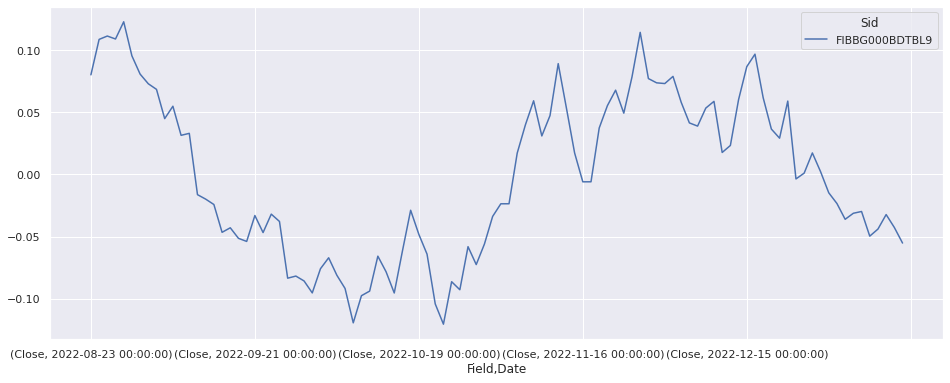

In [286]:
df_return_snp500.tail(100).plot()

In [287]:
df_ind = get_prices("global-1d", sids=index_sids, fields="Close", data_frequency="d")
df_return_ind = get_return(10, 0, df_ind)

In [246]:
df_ind

Sid               FIBBG000DPT7D8  FIBBG000QW7RC0  FIBBG0015M9W30  \
Field Date                                                         
Close 2007-01-05        29.04030             NaN             NaN   
      2007-01-11        29.08980             NaN             NaN   
      2007-01-19        29.25820             NaN             NaN   
      2007-01-22        28.91160             NaN             NaN   
      2007-02-08        30.48590             NaN             NaN   
...                          ...             ...             ...   
      2022-12-23        39.70750          65.300         48.5100   
      2022-12-27             NaN             NaN         48.2850   
      2022-12-28        39.43375          65.175         48.3800   
      2022-12-29        39.64125          65.645         49.2062   
      2022-12-30        39.76000          65.525         48.5500   

Sid               FIBBG0015XN496  FIBBG006H1RJZ6  FIBBG009S0XQY8  
Field Date                                                        
Close 2007-01-05             NaN             NaN             NaN  
      2007-01-11             NaN             NaN             NaN  
      2007-01-19             NaN             NaN             NaN  
      2007-01-22             NaN             NaN             NaN  
      2007-02-08             NaN             NaN             NaN  
...                          ...             ...             ...  
      2022-12-23          131.10         15.6225         20.9775  
      2022-12-27             NaN             NaN             NaN  
      2022-12-28          131.43         15.8075         21.0050  
      2022-12-29          130.73         15.9450         21.1200  
      2022-12-30          128.38         16.0700         20.7875  

[3486 rows x 6 columns]

In [290]:
df_ind * (df_return_ind > 0)

Sid               FIBBG000DPT7D8  FIBBG000QW7RC0  FIBBG0015M9W30  \
Field Date                                                         
Close 2007-01-05            0.00             NaN             NaN   
      2007-01-11            0.00             NaN             NaN   
      2007-01-19            0.00             NaN             NaN   
      2007-01-22            0.00             NaN             NaN   
      2007-02-08            0.00             NaN             NaN   
...                          ...             ...             ...   
      2022-12-23            0.00           0.000             0.0   
      2022-12-27             NaN             NaN             0.0   
      2022-12-28            0.00           0.000             0.0   
      2022-12-29            0.00           0.000             0.0   
      2022-12-30           39.76          65.525             0.0   

Sid               FIBBG0015XN496  FIBBG006H1RJZ6  FIBBG009S0XQY8  
Field Date                                                        
Close 2007-01-05             NaN             NaN             NaN  
      2007-01-11             NaN             NaN             NaN  
      2007-01-19             NaN             NaN             NaN  
      2007-01-22             NaN             NaN             NaN  
      2007-02-08             NaN             NaN             NaN  
...                          ...             ...             ...  
      2022-12-23          131.10             0.0             0.0  
      2022-12-27             NaN             NaN             NaN  
      2022-12-28            0.00             0.0             0.0  
      2022-12-29            0.00             0.0             0.0  
      2022-12-30          128.38             0.0             0.0  

[3486 rows x 6 columns]

In [279]:
df_joined = df_ind.join(df_snp500).rename(columns={sid_snp500: 'snp500'})

In [261]:
sp = (df_joined[sid_snp500] > 0).astype(int)

In [277]:
df_joined[df_joined.snp500 > 0] = 0

In [281]:
df_joined.drop('snp500', axis=1)

Sid               FIBBG000DPT7D8  FIBBG000QW7RC0  FIBBG0015M9W30  \
Field Date                                                         
Close 2007-01-05        29.04030             NaN             NaN   
      2007-01-11        29.08980             NaN             NaN   
      2007-01-19        29.25820             NaN             NaN   
      2007-01-22        28.91160             NaN             NaN   
      2007-02-08        30.48590             NaN             NaN   
...                          ...             ...             ...   
      2022-12-23        39.70750          65.300         48.5100   
      2022-12-27             NaN             NaN         48.2850   
      2022-12-28        39.43375          65.175         48.3800   
      2022-12-29        39.64125          65.645         49.2062   
      2022-12-30        39.76000          65.525         48.5500   

Sid               FIBBG0015XN496  FIBBG006H1RJZ6  FIBBG009S0XQY8  
Field Date                                                        
Close 2007-01-05             NaN             NaN             NaN  
      2007-01-11             NaN             NaN             NaN  
      2007-01-19             NaN             NaN             NaN  
      2007-01-22             NaN             NaN             NaN  
      2007-02-08             NaN             NaN             NaN  
...                          ...             ...             ...  
      2022-12-23          131.10         15.6225         20.9775  
      2022-12-27             NaN             NaN             NaN  
      2022-12-28          131.43         15.8075         21.0050  
      2022-12-29          130.73         15.9450         21.1200  
      2022-12-30          128.38         16.0700         20.7875  

[3486 rows x 6 columns]

In [103]:
df_china = get_securities(exchanges=["XSHG"])
df_norway = get_securities(exchanges=["NOTC"])
df_canada = get_securities(exchanges=["XCNQ", "XTSE"])
df_japan = get_securities(exchanges=["XJPX"])
df_mexico = get_securities(exchanges=["XMEX"])
df_london = get_securities(exchanges=["XLON"])
df_hungary = get_securities(exchanges=["XBUD"])
df_newzealand = get_securities(exchanges=["XNZE"])

df_germany = get_securities(exchanges=["XETR"])
df_hongkong = get_securities(exchanges=["XHKG"])
df_kosdaq = get_securities(exchanges=["XKOS"])
df_nasdaq = get_securities(exchanges=["XNAS"])
df_nyse = get_securities(exchanges=["XNYS"])
df_usotc = get_securities(exchanges=["XOTC"])
df_france = get_securities(exchanges=["XPAR"])
df_singapore = get_securities(exchanges=["XSES"])
df_sweden = get_securities(exchanges=["XSTO"])
df_swiss = get_securities(exchanges=["XSWX"])

dfs = [df_china, df_norway, df_canada, df_japan, df_mexico, df_london, df_hungary, df_newzealand, df_germany, df_hongkong, df_kosdaq, df_nasdaq, df_nyse, df_usotc, df_france, df_singapore, df_sweden, df_swiss]
df = pd.concat(dfs)

In [77]:
df[
    (True)
    & (df.Currency == "USD")
    #& (df.Etf == True)
    #& (df.Etf == False)
    & (df.SecType != 'IND')
    & (df.Delisted == False)
    & (df['Name'].str.lower().str.contains("spy"))
].Name.values[:6]

array(['KRISPY KREME INC'], dtype=object)

In [79]:
df[
    (True)
    & (df.Currency == "USD")
    #& (df.Etf == True)
    #& (df.Etf == False)
    & (df.SecType != 'IND')
    & (df.Delisted == False)
    #& (df['Name'].str.lower().str.contains("fang"))
    #& (df['Name'].str.lower().str.contains("index"))
    #& (df['Name'].str.lower().str.contains("ishare"))
    & (df['Name'].str.lower().str.contains("500"))
]

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG003MVLMY1,ZSP.U,XTSE,CA,USD,STK,True,America/Toronto,BMO S&P 500 Index ETF,1,1,False,NaT,NaT,NaT
FIBBG004DDFCN0,HXS.U,XTSE,CA,USD,STK,True,America/Toronto,Horizons S&P 500 Index ETF,1,1,False,NaT,NaT,NaT
FIBBG00FWQ8RG8,ULV.U,XTSE,CA,USD,STK,True,America/Toronto,Invesco S&P 500 Low Volatility Index ETF (CAD ...,1,1,False,NaT,NaT,NaT
FIBBG00L17GCM8,EQL.U,XTSE,CA,USD,STK,True,America/Toronto,Invesco S&P 500 Equal Weight Index ETF,1,1,False,NaT,NaT,NaT
FIBBG00QFNM965,XUS.U,XTSE,CA,USD,STK,True,America/Toronto,BlackRock Canada iShares Core S&P 500 Index ETF,1,1,False,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FIBBG00Z9DDKR6,SPESGE,XSWX,CH,USD,STK,True,Europe/Zurich,UBS (Irl) ETF plc S&P 500 ESG ELITE UCITS ETF ...,1,1,False,NaT,NaT,NaT
FIBBG01219DY68,UPAB,XSWX,CH,USD,STK,True,Europe/Zurich,BlackRock iShares S&P 500 Paris-Aligned Climat...,1,1,False,NaT,NaT,NaT
FIBBG0178MWCT3,C500,XSWX,CH,USD,STK,True,Europe/Zurich,Invesco S&P China A Midcap 500 Swap UCITS ETF USD,1,1,False,NaT,NaT,NaT


In [105]:
df.loc[sids_index].sort_values('Currency')

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG006H1RJZ6,CASH,XLON,GB,USD,STK,True,Europe/London,L&G ETFS-E Fund MSCI China A GO UCITS ETF,1,1,False,NaT,NaT,NaT
FIBBG000QW7RC0,XCAD,XLON,GB,USD,STK,True,Europe/London,Xtrackers MSCI Canada ESG Screened UCITS ETF,1,1,False,NaT,NaT,NaT
FIBBG009S0XQY8,XDNU,XLON,GB,USD,STK,True,Europe/London,Xtrackers JPX-Nikkei 400 UCITS ETF 4C Hedged USD,1,1,False,NaT,NaT,NaT
FIBBG0015XN496,CMXC,XLON,GB,USD,STK,True,Europe/London,BlackRock iShares MSCI Mexico Capped UCITS ETF...,1,1,False,NaT,NaT,NaT
FIBBG001DQBCC3,IPOL,XLON,GB,USD,STK,True,Europe/London,BlackRock iShares MSCI Poland UCITS ETF USD (Acc),1,1,False,NaT,NaT,NaT
FIBBG000DPT7D8,IDKO,XLON,GB,USD,STK,True,Europe/London,BlackRock iShares MSCI Korea UCITS ETF USD (Dist),1,1,False,NaT,NaT,NaT
FIBBG0017DVJR6,XCS4,XLON,GB,USD,STK,True,Europe/London,Xtrackers MSCI Thailand UCITS ETF 1C,1,1,False,NaT,NaT,NaT
FIBBG0015M9W30,ENZL,XNAS,US,USD,STK,True,America/New_York,ISHARES MSCI NEW ZEALAND ETF,1,1,False,NaT,NaT,NaT


In [63]:
df.loc[sids_index]['Currency'].unique()

array(['USD'], dtype=object)

In [125]:
from quantrocket.ibg import start_gateways
start_gateways(wait=True)

{'ibg1': {'status': 'running'}}

In [134]:
price_fx = get_prices("fx-1d", sids=sids_currency, fields="Close", data_frequency="d")

In [135]:
price_fx

Sid               FXAUDUSD  FXEURUSD  FXGBPUSD  FXNZDUSD  FXUSDCAD  FXUSDCHF  \
Field Date                                                                     
Close 2005-03-09  0.796900  1.343300  1.927550       NaN  1.203000  1.154400   
      2005-03-10  0.790200  1.342500  1.923750       NaN  1.204850  1.153400   
      2005-03-11  0.793000  1.345800  1.925900       NaN  1.205750  1.150200   
      2005-03-13  0.792800  1.345300  1.923650       NaN  1.205900  1.151100   
      2005-03-14  0.788900  1.336300  1.915650       NaN  1.206800  1.159700   
...                    ...       ...       ...       ...       ...       ...   
      2023-01-09  0.691100  1.072960  1.218110  0.638845  1.338885  0.921525   
      2023-01-10  0.689255  1.073325  1.215145  0.636165  1.342550  0.922855   
      2023-01-11  0.690445  1.075820  1.214580  0.634775  1.342420  0.931285   
      2023-01-12  0.696720  1.085415  1.220905  0.640035  1.336885  0.927355   
      2023-01-13  0.695840  1.082900  1.222800  0.637365  1.339740  0.927645   

Sid               FXUSDCNH  FXUSDCZK  FXUSDHKD  FXUSDHUF  FXUSDJPY   FXUSDMXN  \
Field Date                                                                      
Close 2005-03-09       NaN       NaN  7.799550       NaN  104.1100        NaN   
      2005-03-10       NaN       NaN  7.799650       NaN  104.1300        NaN   
      2005-03-11       NaN       NaN  7.799050       NaN  103.9900        NaN   
      2005-03-13       NaN       NaN  7.799450       NaN  104.4200        NaN   
      2005-03-14       NaN       NaN  7.799850       NaN  104.7500        NaN   
...                    ...       ...       ...       ...       ...        ...   
      2023-01-09  6.781890  22.36955  7.803920  369.5095  131.8845  19.157925   
      2023-01-10  6.785120  22.34000  7.808745  371.3170  132.2595  19.072250   
      2023-01-11  6.769465  22.34880  7.813200  370.2700  132.4100  18.927770   
      2023-01-12  6.726540  22.15825  7.808730  366.3585  129.2890  18.838005   
      2023-01-13  6.714770  22.17075  7.808950  367.6205  127.8625  18.770200   

Sid                FXUSDNOK   FXUSDSEK  FXUSDSGD   FXUSDTRY   FXUSDZAR  
Field Date                                                              
Close 2005-03-09        NaN        NaN       NaN        NaN        NaN  
      2005-03-10        NaN        NaN       NaN        NaN        NaN  
      2005-03-11        NaN        NaN       NaN        NaN        NaN  
      2005-03-13        NaN        NaN       NaN        NaN        NaN  
      2005-03-14        NaN        NaN       NaN        NaN        NaN  
...                     ...        ...       ...        ...        ...  
      2023-01-09   9.949050  10.404200  1.330520  18.788355  16.923395  
      2023-01-10   9.990355  10.410745  1.331780  18.774250  17.011300  
      2023-01-11  10.002645  10.462545  1.331270  18.793015  16.916245  
      2023-01-12   9.890745  10.399805  1.325455  18.767100  16.753895  
      2023-01-13   9.904150  10.397395  1.318795  18.813180  16.850005  

[4681 rows x 17 columns]

In [110]:
price_fx.columns

Index(['FXAUDUSD', 'FXEURUSD', 'FXGBPUSD', 'FXNZDUSD', 'FXUSDCAD', 'FXUSDCHF',
       'FXUSDCNH', 'FXUSDCZK', 'FXUSDHKD', 'FXUSDHUF', 'FXUSDJPY', 'FXUSDMXN',
       'FXUSDNOK', 'FXUSDSEK', 'FXUSDSGD', 'FXUSDTRY', 'FXUSDZAR'],
      dtype='object', name='Sid')